In [1]:
# setup shits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

For this particular one:

- Femur is on upper arm

- Tibia is forearm

In [2]:
femur_raw = pd.read_csv('xsens_quaternion/arm_angle_test/upper_arm_stable.csv', skiprows=10)
tibia_raw = pd.read_csv('xsens_quaternion/arm_angle_test/forearm_stable.csv', skiprows=10)
femur_raw.columns = [i+"_femur" for i in femur_raw.columns]
tibia_raw.columns = [i+"_tibia" for i in tibia_raw.columns]
print(femur_raw.columns)

Index(['PacketCounter_femur', 'SampleTimeFine_femur', 'Quat_W_femur',
       'Quat_X_femur', 'Quat_Y_femur', 'Quat_Z_femur', 'FreeAcc_X_femur',
       'FreeAcc_Y_femur', 'FreeAcc_Z_femur'],
      dtype='object')


In [3]:
combined_raw = femur_raw.merge(tibia_raw, how='outer', left_on='SampleTimeFine_femur', right_on='SampleTimeFine_tibia')
# print(combined_raw.head(40))
print(combined_raw.tail(1))
combined_raw.dropna(inplace=True)
print(combined_raw.tail(1))
combined_raw.to_csv('./xsens_quaternion/arm_angle_test/combined_raw_stable.csv', index=False)

      PacketCounter_femur  SampleTimeFine_femur  Quat_W_femur  Quat_X_femur  \
2034                  NaN                   NaN           NaN           NaN   

      Quat_Y_femur  Quat_Z_femur  FreeAcc_X_femur  FreeAcc_Y_femur  \
2034           NaN           NaN              NaN              NaN   

      FreeAcc_Z_femur  PacketCounter_tibia  SampleTimeFine_tibia  \
2034              NaN                  1.0           113455742.0   

      Quat_W_tibia  Quat_X_tibia  Quat_Y_tibia  Quat_Z_tibia  FreeAcc_X_tibia  \
2034      0.785144      0.029406     -0.138681       0.60287         0.026794   

      FreeAcc_Y_tibia  FreeAcc_Z_tibia  
2034         0.205633         0.056549  
      PacketCounter_femur  SampleTimeFine_femur  Quat_W_femur  Quat_X_femur  \
2032               2033.0           147339753.0      0.726851      0.217184   

      Quat_Y_femur  Quat_Z_femur  FreeAcc_X_femur  FreeAcc_Y_femur  \
2032     -0.338208      0.556898         0.001191         0.096969   

      FreeAcc_Z_fe

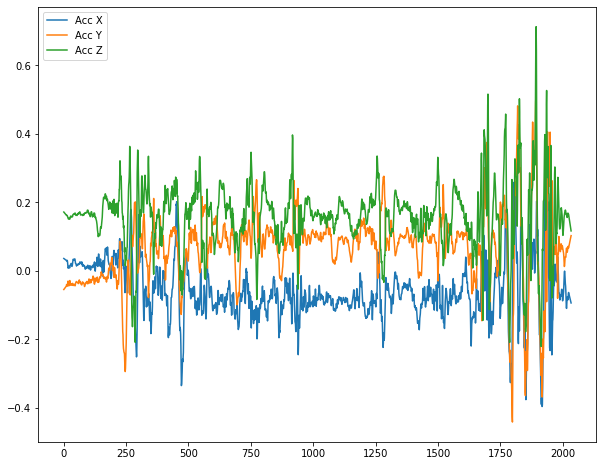

In [4]:
from scipy.signal import savgol_filter

combined_filter = combined_raw.copy()

for i in combined_filter.columns:
    combined_filter[i] = savgol_filter(combined_filter[i], 21, 1)
    
plt.plot(combined_filter['PacketCounter_femur'], combined_filter['FreeAcc_X_femur'], label = 'Acc X')
plt.plot(combined_filter['PacketCounter_femur'], combined_filter['FreeAcc_Y_femur'], label = 'Acc Y')
plt.plot(combined_filter['PacketCounter_femur'], combined_filter['FreeAcc_Z_femur'], label = 'Acc Z')
plt.legend()
plt.show()

[83.06679532808161, 83.11145480724444, 83.1528146279905, 83.1908236431693, 83.22543029648158, 83.25658260855624, 83.28422816316088, 83.30831409361615, 83.32878706948934, 83.34559328364718, 83.35867843975383, 80.95224548745931, 80.46704782021482, 82.42309911963082, 84.652571030262, 85.29214256677137, 83.10397736697509, 81.07956711156726, 82.0588033630674, 85.49576855319263, 88.68483617009547, 88.34494383206643, 85.15620246131506, 82.18362151235873, 80.84205104260491, 81.64223540005577, 84.13887652757539, 85.00309298623556, 83.61008584569578, 82.06079638861759, 81.41407654907213, 82.07052757869, 84.31937817640593, 84.96940680981632, 84.0152558989408, 81.9443437166065, 80.74344583688313, 81.07773824071592, 81.56467751549589, 81.19950303217763, 80.15666823930167, 79.50734576871656, 78.89284520348197, 79.22983498814374, 80.39967865569587, 81.32342151846902, 81.55759857796549, 80.93947038593048, 80.83580035026516, 80.24257356134794, 79.74520466418255, 80.02172687229306, 80.93713225560556, 80

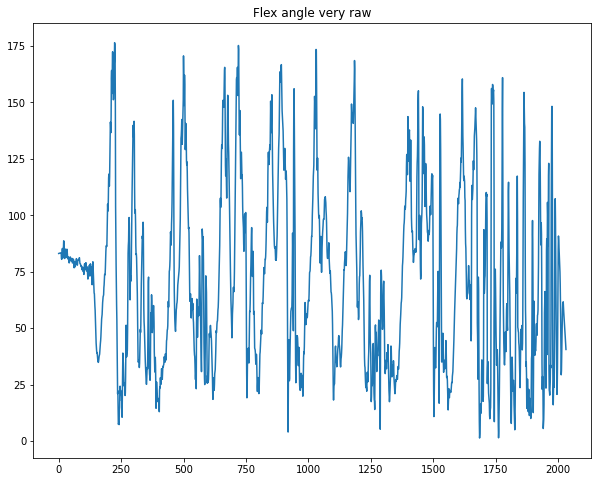

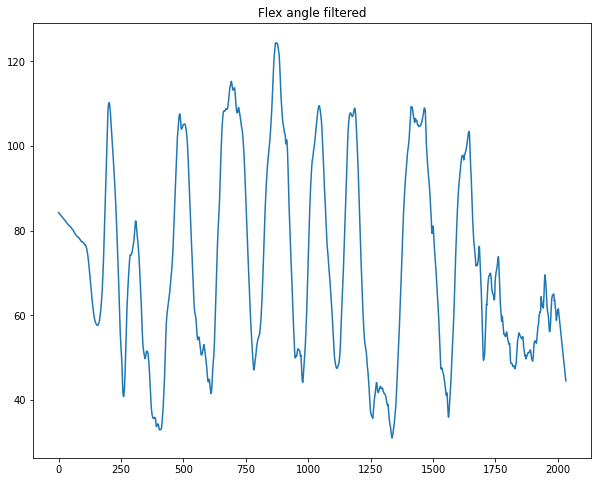

In [5]:
import numpy as np

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

dot_prod = []

for row in range(len(combined_filter)):
    data_row = combined_filter.iloc[row]
    femur_vec = np.array([data_row['FreeAcc_X_femur'], data_row['FreeAcc_Y_femur'], data_row['FreeAcc_Z_femur']])
    tibia_vec = np.array([data_row['FreeAcc_X_tibia'], data_row['FreeAcc_Y_tibia'], data_row['FreeAcc_Z_tibia']])
    
    dot_prod.append(angle_between(femur_vec, tibia_vec))
    
    
flex_angle = [np.rad2deg(i) for i in dot_prod]
print(flex_angle)

plt.plot(flex_angle)
plt.title("Flex angle very raw")
plt.show()

flex_angle_filter = savgol_filter(flex_angle, 61, 1)
plt.plot(flex_angle_filter)
plt.title("Flex angle filtered")
plt.show()